In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv(r'C:\Users\Priyanshi\Documents\Summer analytics\train.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
test= pd.read_csv(r'C:\Users\Priyanshi\Documents\Summer analytics\test.csv')
print("Shape of train data ", train.shape)
print("Shape of test data ", test.shape)

Shape of train data  (8523, 12)
Shape of test data  (5681, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


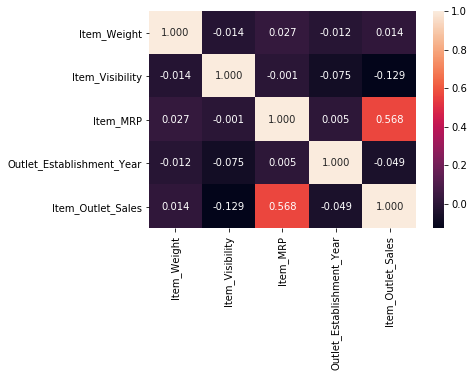

In [5]:
sns.heatmap(train.corr(), annot=True, fmt='.3f')

In [6]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [4]:
train.Item_Fat_Content.replace({'Low Fat': 'LF', 'Regular':'reg', 'low fat':'LF'}, inplace= True)
train.Item_Fat_Content.value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

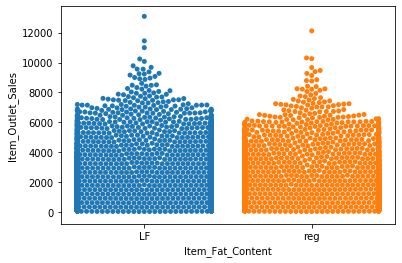

In [8]:
sns.swarmplot(train.Item_Fat_Content, train.Item_Outlet_Sales)

In [8]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

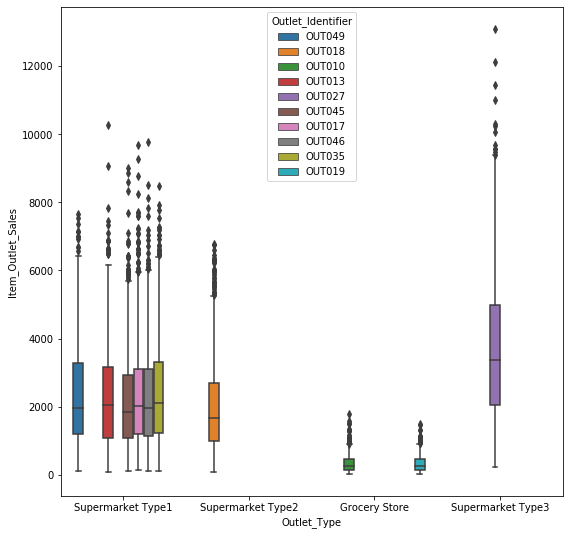

In [9]:
fig= plt.figure(figsize=(9,9))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue= 'Outlet_Identifier', data= train )

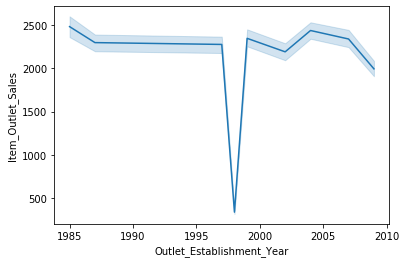

In [10]:
sns.lineplot(train.Outlet_Establishment_Year, train.Item_Outlet_Sales)

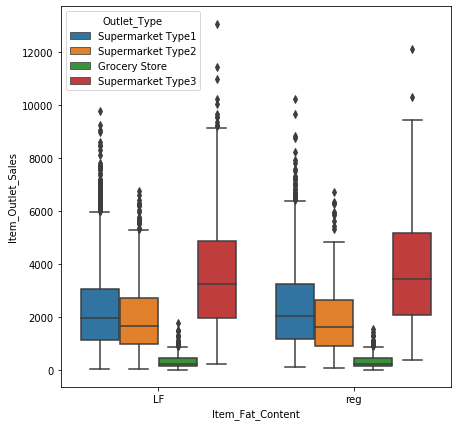

In [11]:
fig= plt.figure(figsize=(7,7))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', hue= 'Outlet_Type', data= train )

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

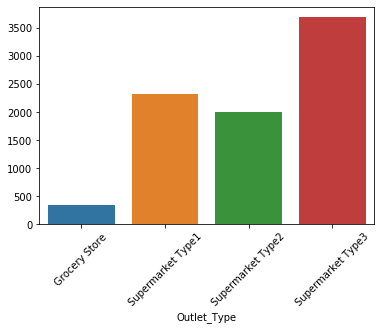

In [12]:
sale= train.Item_Outlet_Sales.groupby(train.Outlet_Type).mean()
sns.barplot(sale.index, sale.values)
plt.xticks(rotation=45)
sale

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

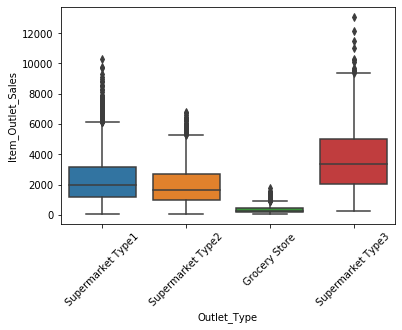

In [13]:
sns.boxplot(train.Outlet_Type, train.Item_Outlet_Sales)
plt.xticks(rotation=45)

In [14]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

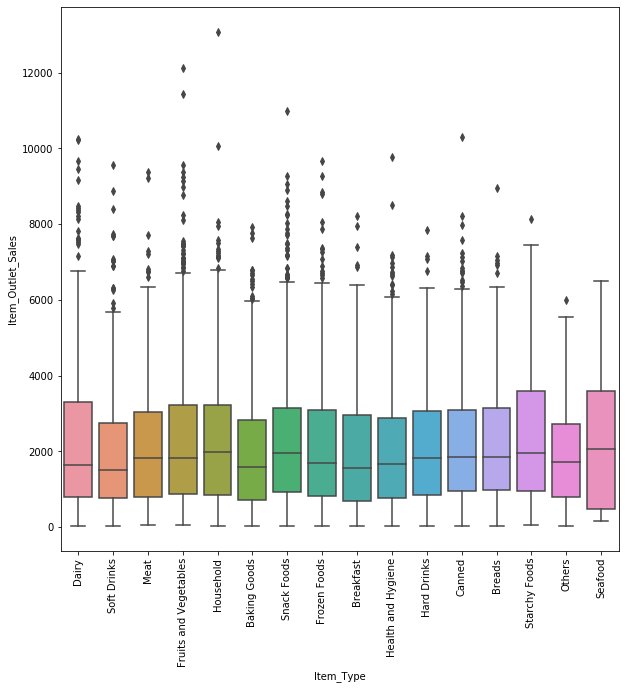

In [15]:
fig= plt.figure(figsize=(10,10))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data= train)
plt.xticks(rotation=90)

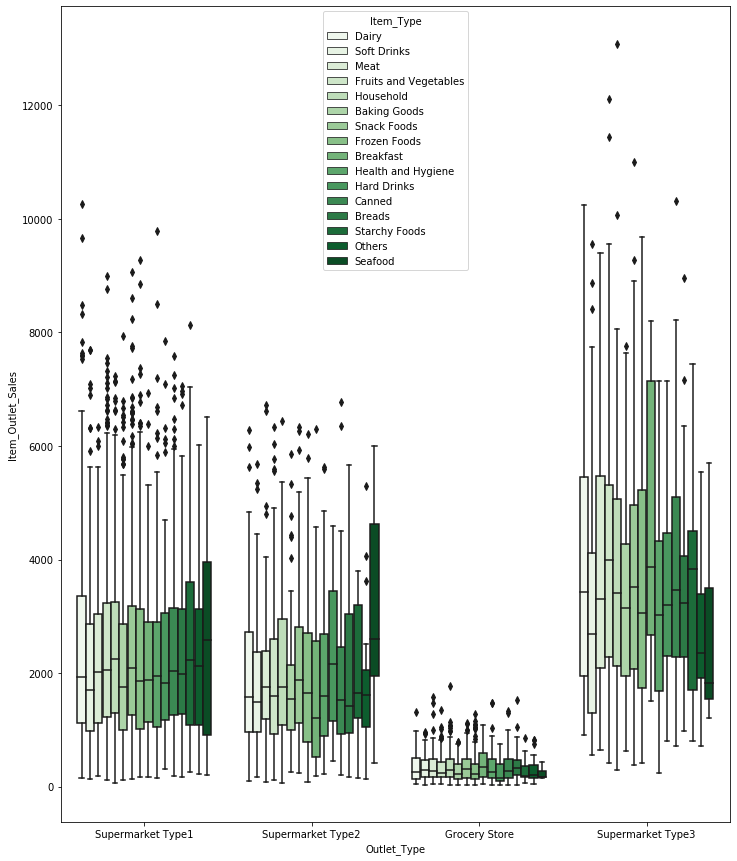

In [16]:
fig= plt.figure(figsize=(12,15))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue= 'Item_Type', data= train,palette='Greens')

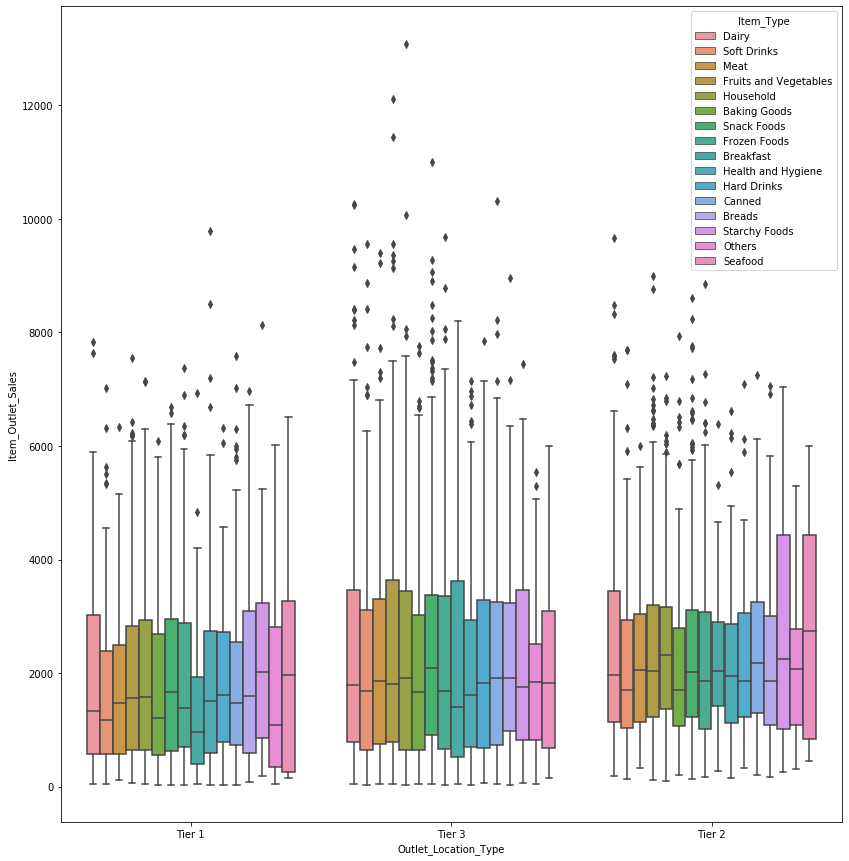

In [17]:
fig= plt.figure(figsize=(14,15))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue= 'Item_Type', data= train)

In [18]:
print('Unique outlet size ',train.Outlet_Size.unique())  
print('Unique outlet location type ',train.Outlet_Location_Type.unique())  
print('Unique outlet type ',train.Outlet_Type.unique())

Unique outlet size  ['Medium' nan 'High' 'Small']
Unique outlet location type  ['Tier 1' 'Tier 3' 'Tier 2']
Unique outlet type  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

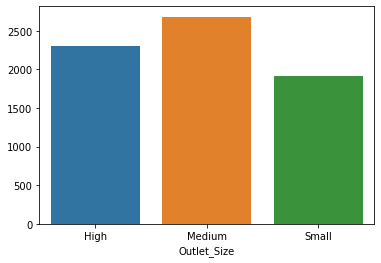

In [19]:
sale= train.Item_Outlet_Sales.groupby(train.Outlet_Size).mean()
sns.barplot(sale.index, sale.values)
sale

In [5]:
train.Outlet_Size.dropna(axis=0, inplace=True)
print('Unique outlet size ',train.Outlet_Size.value_counts())  

Unique outlet size  Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


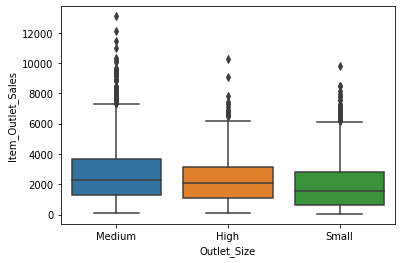

In [21]:
sns.boxplot(train.Outlet_Size,train.Item_Outlet_Sales)

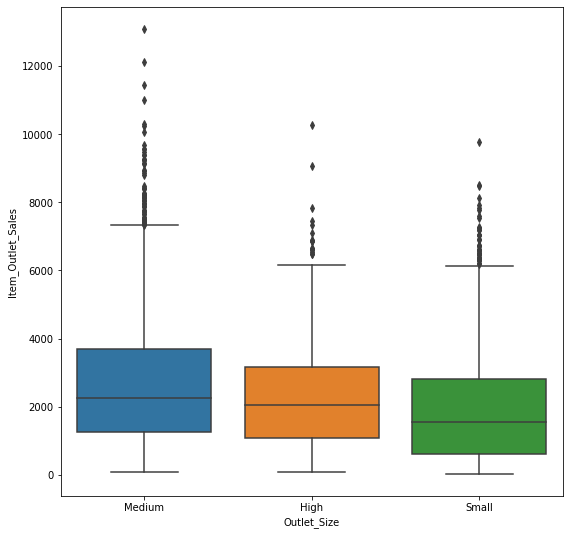

In [22]:
fig= plt.figure(figsize=(9,9))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales', hue_order=['Outlet_Identifier','Outlet_Type'], data= train)

In [6]:
train.Item_Weight.fillna(0, inplace=True)
train.Item_Weight.isnull().any()

False

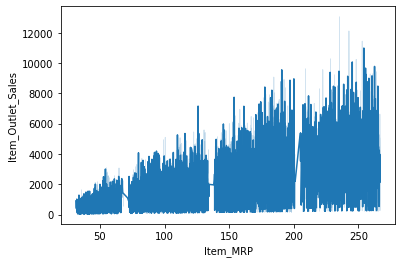

In [24]:
sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data= train)

## Applying decision tree based algorithm without transforming categorical features to numerical values

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Bagging method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [8]:
train=pd.get_dummies(data=train, columns=['Item_Type','Outlet_Type','Outlet_Size'])

In [9]:
train_fea= train.drop(columns=['Item_Identifier','Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type'])

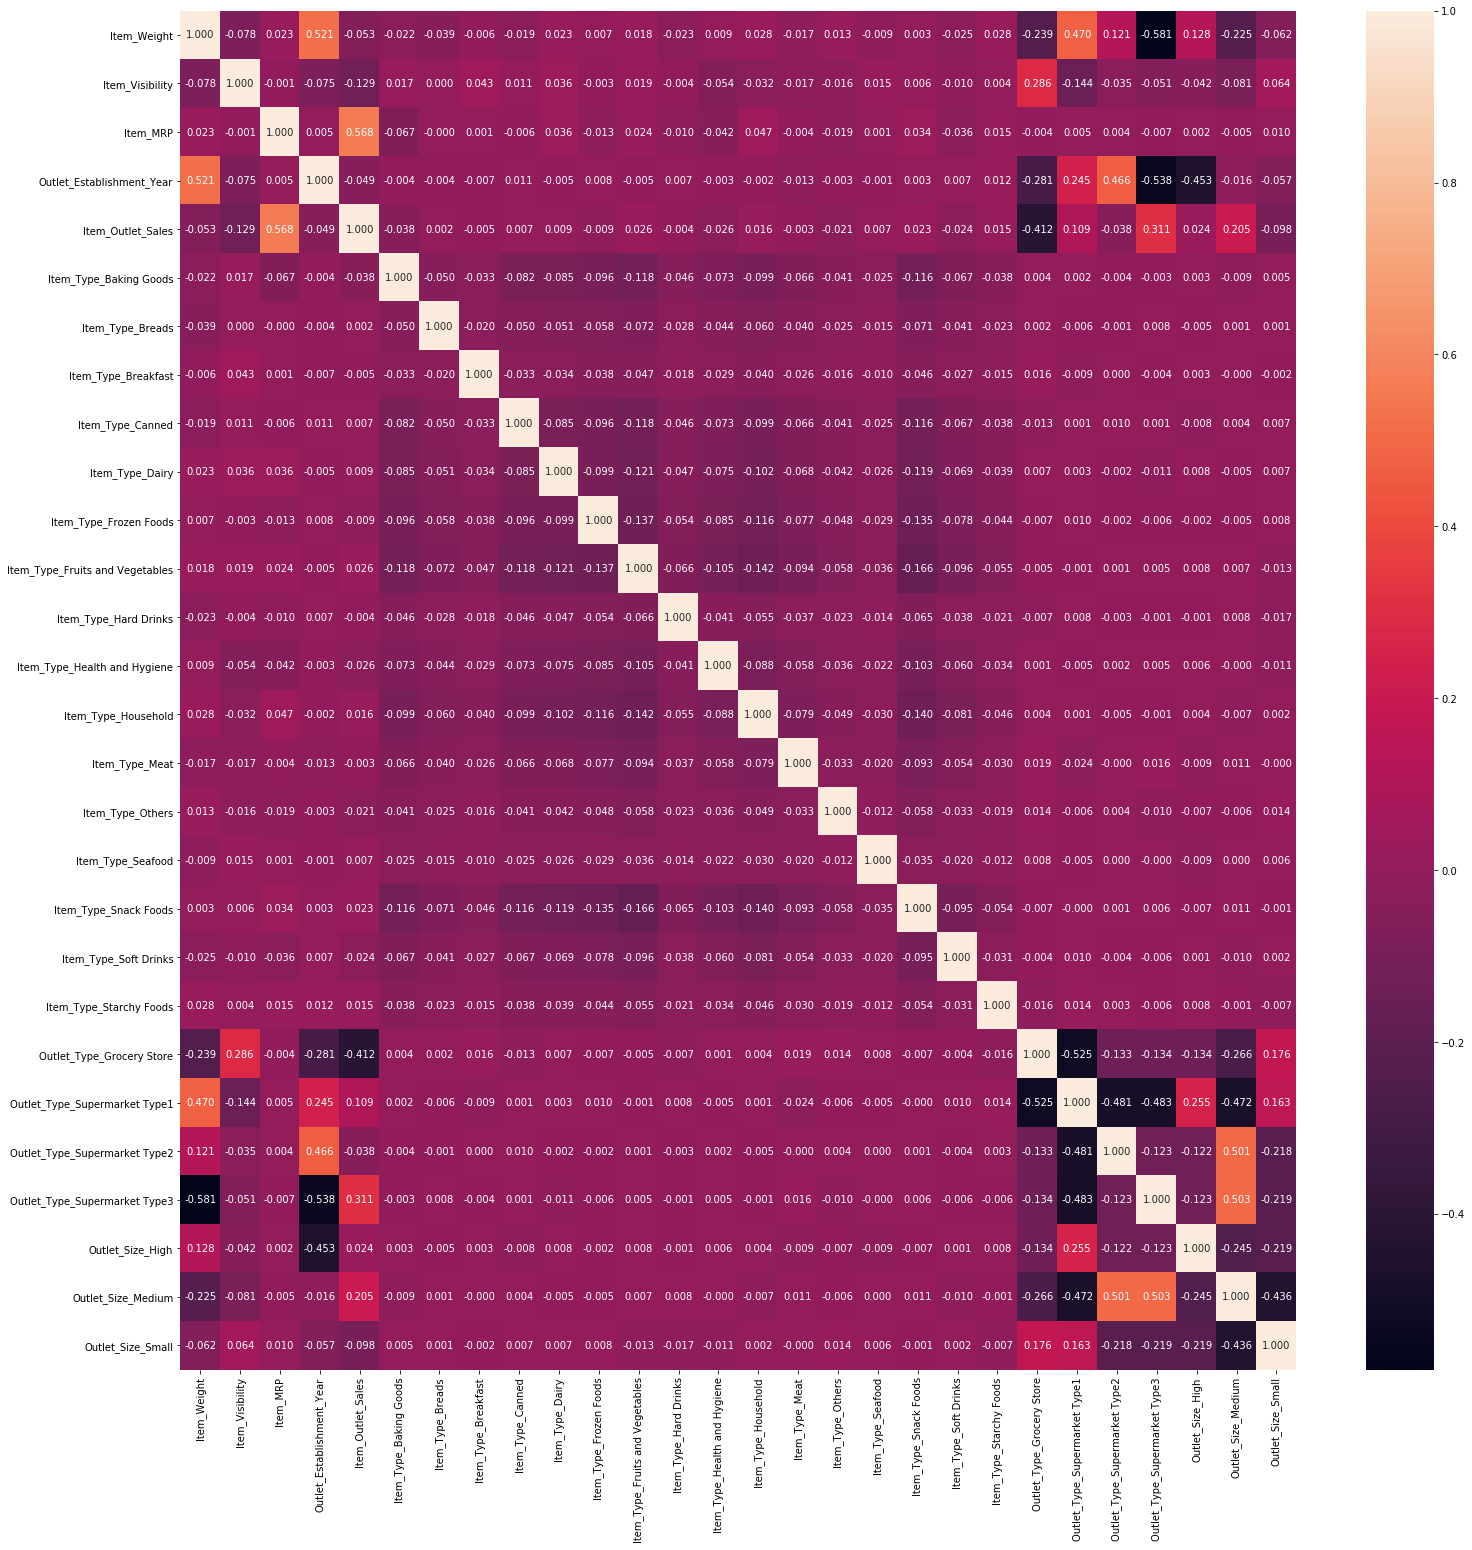

In [28]:
fig= plt.figure(figsize=(25,25))
sns.heatmap(train_fea.corr(), annot=True, fmt='.3f')

In [10]:
train_fea= train_fea.drop(columns=['Item_Outlet_Sales'])
train_lab= train['Item_Outlet_Sales']
train_fea

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,9.300,0.016047,249.8092,1999,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,19.200,0.000000,182.0950,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,2009,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [11]:
X_train, X_valid, y_train, y_valid= train_test_split(train_fea, train_lab, test_size=0.33, shuffle=True)
print("X_train shape ",X_train.shape)
print("X_valid shape ",X_valid.shape)

X_train shape  (5710, 27)
X_valid shape  (2813, 27)


In [12]:
dtr= DecisionTreeRegressor()
param= {'min_samples_split': range(10,500,20), 'max_depth': range(3,30,3)}
dtr_cv= GridSearchCV(dtr, param_grid= param)
dtr_cv.fit(X_train, y_train)
print(dtr_cv.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=70,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [13]:
from sklearn.metrics import mean_squared_error as mse
dtr_pred= dtr_cv.predict(X_valid)
dtr_err= np.sqrt(mse(y_valid, dtr_pred))
print('dtr_pred error is ', dtr_err)

dtr_pred error is  1058.6467871788145


In [14]:
"""rfr= RandomForestRegressor()
param= {'n_estimators': range(100,1000,100), 'min_samples_split': range(2,10,2), 'max_depth': range(3,15,3)}
rfr_cv= GridSearchCV(rfr, param_grid= param)
rfr_cv.fit(X_train, y_train)
print(rfr_cv.best_estimator_)"""

"""RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)"""

rfr= RandomForestRegressor(n_estimators= 400, max_depth= 6)
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_valid)
rfr_err= np.sqrt(mse(y_valid, rfr_pred))
print('rfr_pred error is ', rfr_err)

rfr_pred error is  1043.6722557080761


In [15]:
rfr_2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=50,n_jobs=4)
rfr_2.fit(X_train, y_train)
rfr_2_pred= rfr_2.predict(X_valid)
rfr_2_err= np.sqrt(mse(y_valid, rfr_2_pred))
print('rfr_2_pred error is ', rfr_2_err)

rfr_2_pred error is  1041.275168879318


In [16]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(X_train, y_train)
svr_pred= svr.predict(X_valid)
svr_err= np.sqrt(mse(y_valid, svr_pred))
print('svr_pred error is ', svr_err)

svr_pred error is  1674.6015009339042


In [17]:
## R2 score of each model
from sklearn.metrics import r2_score
print("r2_score of Decision tree model: ", r2_score(y_valid, dtr_pred))
print("r2_score of Random forest model: ", r2_score(y_valid, rfr_pred))
print("r2_score of Random forest 2 model: ", r2_score(y_valid, rfr_2_pred))
print("r2_score of SVR model: ", r2_score(y_valid, svr_pred))

r2_score of Decision tree model:  0.5909355323697463
r2_score of Random forest model:  0.6024260992960122
r2_score of Random forest 2 model:  0.6042502825439187
r2_score of SVR model:  -0.023558199787116818


In [18]:
rfr_arr= np.array(rfr_pred)
rfr_valid= np.array(y_valid)
print("rfr_arr", rfr_arr)
print("rfr_valid", rfr_valid)

rfr_arr [1672.4388639  2086.86101848 1673.23273074 ... 2644.96926343 1768.30076042
 4256.71802781]
rfr_valid [1471.418  2885.5772 2024.032  ... 2406.867   663.1368 5410.9566]


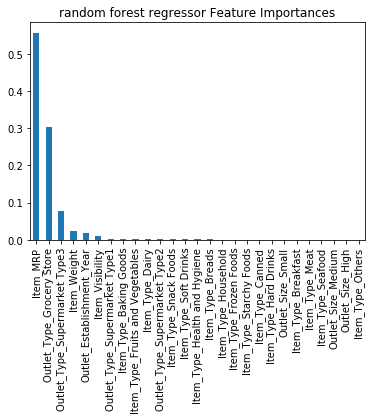

In [19]:
coef3 = pd.Series(rfr.feature_importances_, X_train.columns).sort_values(ascending=False)
coef3.plot(kind='bar', title='random forest regressor Feature Importances')

In [20]:
test= pd.read_csv(r'C:\Users\Priyanshi\Documents\Summer analytics\test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [51]:
sample_submission= pd.read_csv(r'C:\Users\Priyanshi\Documents\Summer analytics\sample_submission_big mart.csv')
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [21]:
test.Item_Fat_Content.replace({'Low Fat': 'LF', 'Regular':'reg', 'low fat':'LF'}, inplace= True)
test.Item_Fat_Content.value_counts()

LF     3668
reg    2013
Name: Item_Fat_Content, dtype: int64

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [22]:
test.Item_Weight.fillna(0, inplace=True)
test.Outlet_Size.fillna("Medium", axis=0,inplace=True)

In [23]:
test=pd.get_dummies(data=test, columns=['Item_Type','Outlet_Type','Outlet_Size'])
submission= pd.DataFrame({'Item_Identifier': test['Item_Identifier'], 'Outlet_Identifier': test['Outlet_Identifier']})
test= test.drop(columns=['Item_Identifier','Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type'])
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,20.750,0.007565,107.8622,1999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,14.600,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,7.315,0.015388,155.0340,2007,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.000,0.118599,234.2300,1985,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [62]:
sub_pred= rfr.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.head()
# Gave RMSE= 1159.7036655366

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1625.690237
1,FDW14,OUT017,1359.961485
2,NCN55,OUT010,618.225149
3,FDQ58,OUT017,2427.149560
4,FDY38,OUT027,6015.043568


In [63]:
submission.to_csv('submission1.csv',index=False)

In [34]:
sub_pred= dtr_cv.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.loc[[473,4136,4653],:]
# Gave RMSE= 1158.99437484059

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
473,FDH28,OUT010,84.651714
4136,FDS60,OUT010,440.010575
4653,FDV58,OUT010,481.131291


In [65]:
submission.to_csv('submission1.csv',index=False)

In [66]:
sub_pred= rfr_2.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.head()
# Gave RMSE= 1162.29187485149

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1653.906477
1,FDW14,OUT017,1388.771756
2,NCN55,OUT010,540.337668
3,FDQ58,OUT017,2372.709750
4,FDY38,OUT027,5265.508175


In [67]:
submission.to_csv('submission1.csv',index=False)

In [68]:
# Fitting over all train data set
rfr.fit(train_fea, train_lab)
sub_pred= rfr.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.to_csv('submission1.csv',index=False)
# Gave RMSE= 1155.51259961053

In [73]:
# Fitting over all train data set
rfr_2.fit(train_fea, train_lab)
sub_pred= rfr_2.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.to_csv('submission1.csv',index=False)
# Gave RMSE= 1153.90307552406

In [74]:
# Fitting over all train data set
svr.fit(train_fea, train_lab)
sub_pred= svr.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.to_csv('submission1.csv',index=False)
# Gave RMSE= 1809.22909317747

In [25]:
from xgboost import XGBRegressor

In [37]:
xgr= XGBRegressor(objective='reg:squarederror')
xgr.fit(X_train, y_train)
xgr_pred= xgr.predict(X_valid)
xgr_err= np.sqrt(mse(y_valid, xgr_pred))
print("Error of xgr: ", xgr_err)
print("R2 score: ", r2_score(y_valid, xgr_pred))

Error of xgr:  1042.2880260571856
R2 score:  0.6034800098951875


In [50]:
sub_pred= xgr.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission.loc[[473,4136,4653],'Item_Outlet_Sales' ]=-1*submission.loc[[473,4136,4653],'Item_Outlet_Sales' ]
submission.to_csv('submission1.csv',index=False)

In [51]:
submission.loc[[473,4136,4653],:]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
473,FDH28,OUT010,100.788383
4136,FDS60,OUT010,121.562363
4653,FDV58,OUT010,225.270920


In [52]:
xgr.fit(train_fea, train_lab)
sub_pred= xgr.predict(test)
submission['Item_Outlet_Sales']= sub_pred
submission[submission['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
674,FDU21,OUT010,-4.145699
4136,FDS60,OUT010,-213.436310
4653,FDV58,OUT010,-253.821320


In [53]:
submission.loc[[674,4136,4653],'Item_Outlet_Sales' ]=-1*submission.loc[[473,4136,4653],'Item_Outlet_Sales' ]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [62]:
submission['Item_Outlet_Sales'].fillna(np.mean(submission['Item_Outlet_Sales']), inplace=True)

In [63]:
submission.to_csv('submission1.csv',index=False)